# **SHORT QUESTIONS**

### 1. Please outline uncertainty quantification using a 3 term polynomial chaos expansion for the simple equation:

$$
\frac{d^2u}{dx^2} + Ku = 0, \; u(0) = 0, \; \frac{du}{dx}(0) = 1, \: K \sim \mathcal{N}(1, 0.2)
$$

### [8 points]

Okay so what we really want is to be able to get some sense of expected value and variance so we can be probabilistic about this simple equation and we can achieve this through polynomial chaos expansion

$$\frac{d^2u}{dx^2} + Ku = 0, \quad u(0) = 0, \quad \frac{du}{dx}(0) = 1, \quad K \sim \mathcal{N}(1, 0.2)$$

Now, lets reformulate $K$ as the following $K = 1 + 0.2\xi$ where $\xi \sim \mathcal{N}(0,1)$.

We can now do our polynomial expansion as follows:

$$u(x,\xi) = u_0(x) + u_1(x)\xi + u_2(x)\xi^2$$

If we plug this and our new $K$ formulation into our original $\frac{d^2u}{dx^2} + Ku = 0$ we get the folloing:

$$\frac{d^2u_0}{dx^2} + \frac{d^2u_1}{dx^2}\xi + \frac{d^2u_2}{dx^2}\xi^2 + u_0 + 0.2u_0\xi + u_1\xi + 0.2u_1\xi^2 + u_2\xi^2 + 0.2u_2\xi^3 = 0$$

Next lets group by the collecting powers of $\xi$ and we get the following three diff eqs:

$$\begin{align}
u_0''(x) + u_0(x) &= 0 \\
u_1''(x) + u_1(x) &= -0.2u_0(x) \\
u_2''(x) + u_2(x) &= -0.2u_1(x)
\end{align}$$

with $u_0(0) = 0, u_0'(0) = 1$ and $u_i(0) = u_i'(0) = 0$ for $i \geq 1$.

If we look at these systems of equations with our previous givens we can show that we get the following:

$$\begin{align}
u_0(x) &= \sin(x) \\
u_1(x) &= 0.1x\cos(x) \\
u_2(x) &= 0.01x^2\cos(x) - 0.01x\sin(x)
\end{align}$$

Therefore, plug and chug:

$${u(x,\xi) = \sin(x) + 0.1x\cos(x)\xi + (0.01x^2\cos(x) - 0.01x\sin(x))\xi^2}$$

Now, onto the uncertainty quantification.

Using $\mathbb{E}[\xi] = 0$, $\mathbb{E}[\xi^2] = 1$, $\text{Var}[\xi] = 1$, $\text{Var}[\xi^2] = 2$:

$$\mathbb{E}[u(x)] = \sin(x) + 0.01x^2\cos(x) - 0.01x\sin(x)$$

$$\text{Var}[u(x)] = (0.1x\cos(x))^2 + 2(0.01x^2\cos(x) - 0.01x\sin(x))^2$$

### 2. Please formally define adjoint operators. [4 points]

I think I went a little bit overboard because I wasn't sure exactly what definition was wanted. So I looked at some textbooks and notes and such. Hopefully this is sufficient.

For a linear operator $L$, its adjoint $L^*$ is defined as the follwing:
$$\langle Lu, v \rangle = \langle u, L^* v \rangle$$

This just says we can "move" the operator from one side of an inner product to the other. Where L maps from u to v and $L^*$ maps from v to u. For matrices, the adjoint is the conjugate transpose: $\langle Ax, y \rangle = \langle x, A^T y \rangle$. For differential operators, adjoints typically involve integration by parts—e.g., the adjoint of $\frac{d}{dx}$ is $-\frac{d}{dx}$ (plus boundary terms).

Now lets put this in the context of how this was introduced in class with PDEs and residual. I'm essentially writing out our notes and then talking a bit more. Given a PDE $Lu = f$, we define the residual as:
Given a PDE with solution $u$ and parameters $\alpha$ (physical or numerical), we define the residual:
$$R(u, \alpha) = 0$$

At the true solution, the residual is of course 0. Now suppose we want the sensitivity of some quantity of interest $J(u, \alpha)$ (like max stress) with respect to parameters. The total derivative as provided in class is:
$$\frac{dJ}{d\alpha} = \frac{\partial J}{\partial \alpha} + \frac{\partial J}{\partial u}\frac{du}{d\alpha}$$

The problem is that $\frac{du}{d\alpha}$ is expensive—we'd need to re-solve the PDE for every parameter perturbation.

Since $R = 0$, we also have $\delta R = 0$:
$$\delta R = \frac{\partial R}{\partial u}\delta u + \frac{\partial R}{\partial \alpha}\delta \alpha = 0$$

Since this is zero thats amazing because we have the ability to multiply this zero by $\Phi^T$ and add it to our sensitivity expression because of course adding zero changes nothing and we get the following:

$$\frac{dJ}{d\alpha} = \frac{\partial J}{\partial \alpha} + \frac{\partial J}{\partial u}\frac{du}{d\alpha} + \Phi^T\left[\frac{\partial R}{\partial u}\frac{du}{d\alpha} + \frac{\partial R}{\partial \alpha}\right]$$

Moving some math things around we get the following

$$\frac{dJ}{d\alpha} = \frac{\partial J}{\partial \alpha} + \Phi^T\frac{\partial R}{\partial \alpha} + \left[\frac{\partial J}{\partial u} + \Phi^T\frac{\partial R}{\partial u}\right]\frac{du}{d\alpha}$$

If we choose $\Phi$ to kill the bracket term, we never need to compute $\frac{du}{d\alpha}$ which is the main problem and is very difficult if not impossible to calcualte. Thus,
$$\left(\frac{\partial R}{\partial u}\right)^T \Phi = -\left(\frac{\partial J}{\partial u}\right)^T$$

As termed in class this is the adjoint equation. We solve it once for $\Phi$, then get sensitivities to any parameter $\alpha$ cheaply!!!!
$$\frac{dJ}{d\alpha} = \frac{\partial J}{\partial \alpha} + \Phi^T\frac{\partial R}{\partial \alpha}$$

The adjoint $\Phi$ encodes how perturbations in the residual affect our quantity of interest $J$.

So the bottom line is as follows. Even if the original (forward) PDE is nonlinear and complex, the adjoint equation is always linear, it's just a matrix equation involving $\left(\frac{\partial R}{\partial u}\right)^T$ evaluated at the already-computed solution $u$ which is tractable. So the adjoint method transforms the problem of computing sensitivities through a nonlinear PDE into solving a single linear system once, after which you get gradients with respect to your parameters which is what we want!

### 3. Why is Gaussian process regression often preferred for SciML problems? [4 points]

Gaussian process regression provides built-in uncertainty quantification, which is critical when modeling physical systems with limited or noisy data. therefore giving not just predictions but confidence intervals that indicate when the model is unreliable. This is very helpful when safety-critical elements are on the line for these predictions such as natural disasters like earthquakes. Additionally, it is really helpful that they can learn with additional data. For example you simply improve uncertainty as you add more and more data, that is the best part about bayesian methods. For this reason they are extremely data-efficient, working well with small datasets ($10$-$1000$ samples), which is essential when each physics simulation takes hours to run. Also they have some amount of interpretability with the kernel structure allows incorporating prior physical knowledge about smoothness, periodicity, or other constraints known about the system. This is all very helpful with SciML as we can build in our priors about the system and it works well if we have limited actual (and noisy) data that we have measured. GPs use a Bayesian framework that naturally handles hyperparameter uncertainty rather than requiring expensive grid search which is helpful as well. The main limitation is $O(N^3)$ computational scaling, making them impractical for very large datasets without approximations.

### 4. Please define PINNs and some common challenges with PINNs. [4 points]

Physics-Informed Neural Networks (PINNs) are neural networks trained to solve PDEs by minimizing a combined loss function: $L = L_{data} + \lambda \cdot L_{physics}$, where the physics loss enforces that the PDE is satisfied at inner points (computed via automatic differentiation) and also at boundary points aka enforcing that the boundary conditions are satisfied. You can use these in low data scenarios but you can also remove the data loss portion and just rely upon the physics. PINNs don’t actually need data in the traditional sense because the PDE itself is the supervision. Instead of learning from labeled input–output pairs, the network is trained so that its predictions make the PDE residual go to zero and satisfy boundary/initial conditions. The key idea is that instead of just fitting data, the network must also satisfy the governing differential equations throughout the domain. 

Now for the major challenges PINNs require near-zero loss to achieve low L2RE (L2 relative error, their solution accuracy metric), but there's a particularly insidious failure mode related to boundary conditions, from Figure 2 of the paper referenced in the PINN notes from class you need to drop the loss by 100× to improve solution accuracy by just 10×. And additionally PINNs can achieve near-zero residual loss while learning completely wrong solutions. Additionally training can be hard balancing the weight of the losses can be very difficult and ill conditioned differential operators lead to bad results. Additionally there is a large risk of vanishing or exploding gradients. Also, PINNs suffer from spectral bias, meaning they learn low-frequency features easily but struggle with high-frequency or sharp gradients in solutions.

### 5. Why are Fourier Neural Operators used in modeling a large class of physics based problems?[4 points]

Fourier Neural Operators (FNOs) learn operators $\Phi: \mathcal{A} \to \mathcal{U}$ that map between function spaces—for example, $\mathcal{A}$ contains functions $a: D \to \mathbb{R}^M$ (like an $M$-dimension function space) and $\mathcal{U}$ contains functions $u: D \to \mathbb{R}^N$ (like an $N$-dimensional solution function space). We are able to map between these embeddings spaces using the fourier space. We can do this with FNOs by transforming inputs into Fourier space, applying learned linear transformations to the Fourier modes, and then transforming back into the other space.

We covered two of FNOs important theoretical claims in class. First, they are universal approximators of continuous operators, meaning they can approximate any solution operator $\mathcal{G}: a \mapsto u$ to some arbitrary accuracy. Second we discussed how they are discretization invariant, since Fourier modes are continuous basis functions, a model trained at one resolution should work at any resolution theoretically. However, these are existence results, not practical guarantees. In practice the universal approximation doesn't tell you how big the network needs to be or whether training will succeed which can be difficult, and discretization invariance can break down in practice due to the fact that coarse-grid training may miss fine-scale features entirely.

For this reason, a key practical limitation is that due to real memory constraints FNOs truncate to $k_{max}$ Fourier modes, for this reason they are practically good at capturing smooth, low-frequency behavior but bad at resolving steep sharp gradients and discontinuities that require high-frequency content that can be captured theoretically but because of our truncated modes we cannot. However, as discussed also in class do not fear MANY physics based problems fall under this category. This is why FNOs work well for the large class of Physics problems because they all call under the low-frequency smooth solution blanket, here are a few concrete examples showing that these problems tend to be low frequency: elliptic problems (Darcy flow), parabolic problems (heat diffusion like we've been working with), etc.

# **PROBLEMS:**

In [1]:
# Problems 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gpytorch
import torch
import tqdm

2D GP Regression: (x, K) -> u

Step 1: Generating training data...
Generated 150 training samples
x range: [1.27, 49.36]
K range: [3.79, 39.26]
u range: [-20.78, 31.54]

Training input shape: torch.Size([150, 2])
Training output shape: torch.Size([150])

Step 2: Initializing 2D GP model...
Model: ExactGPModel
Kernel: RBF with ARD (separate lengthscales for x and K)
Initial noise: 0.0400

Step 3: Training the GP model...
Iter 20/3000 - Loss: 16.552 | Noise: 0.1900 | Lengthscales: x=1.87, K=1.87
Iter 40/3000 - Loss: 8.315 | Noise: 0.4481 | Lengthscales: x=2.75, K=2.74
Iter 60/3000 - Loss: 6.331 | Noise: 0.7134 | Lengthscales: x=3.21, K=3.23
Iter 80/3000 - Loss: 5.430 | Noise: 0.9652 | Lengthscales: x=3.52, K=3.57
Iter 100/3000 - Loss: 4.880 | Noise: 1.2015 | Lengthscales: x=3.78, K=3.84
Iter 120/3000 - Loss: 4.502 | Noise: 1.4152 | Lengthscales: x=4.00, K=4.06
Iter 140/3000 - Loss: 4.224 | Noise: 1.6002 | Lengthscales: x=4.20, K=4.26
Iter 160/3000 - Loss: 4.011 | Noise: 1.7545 | Lengthsc

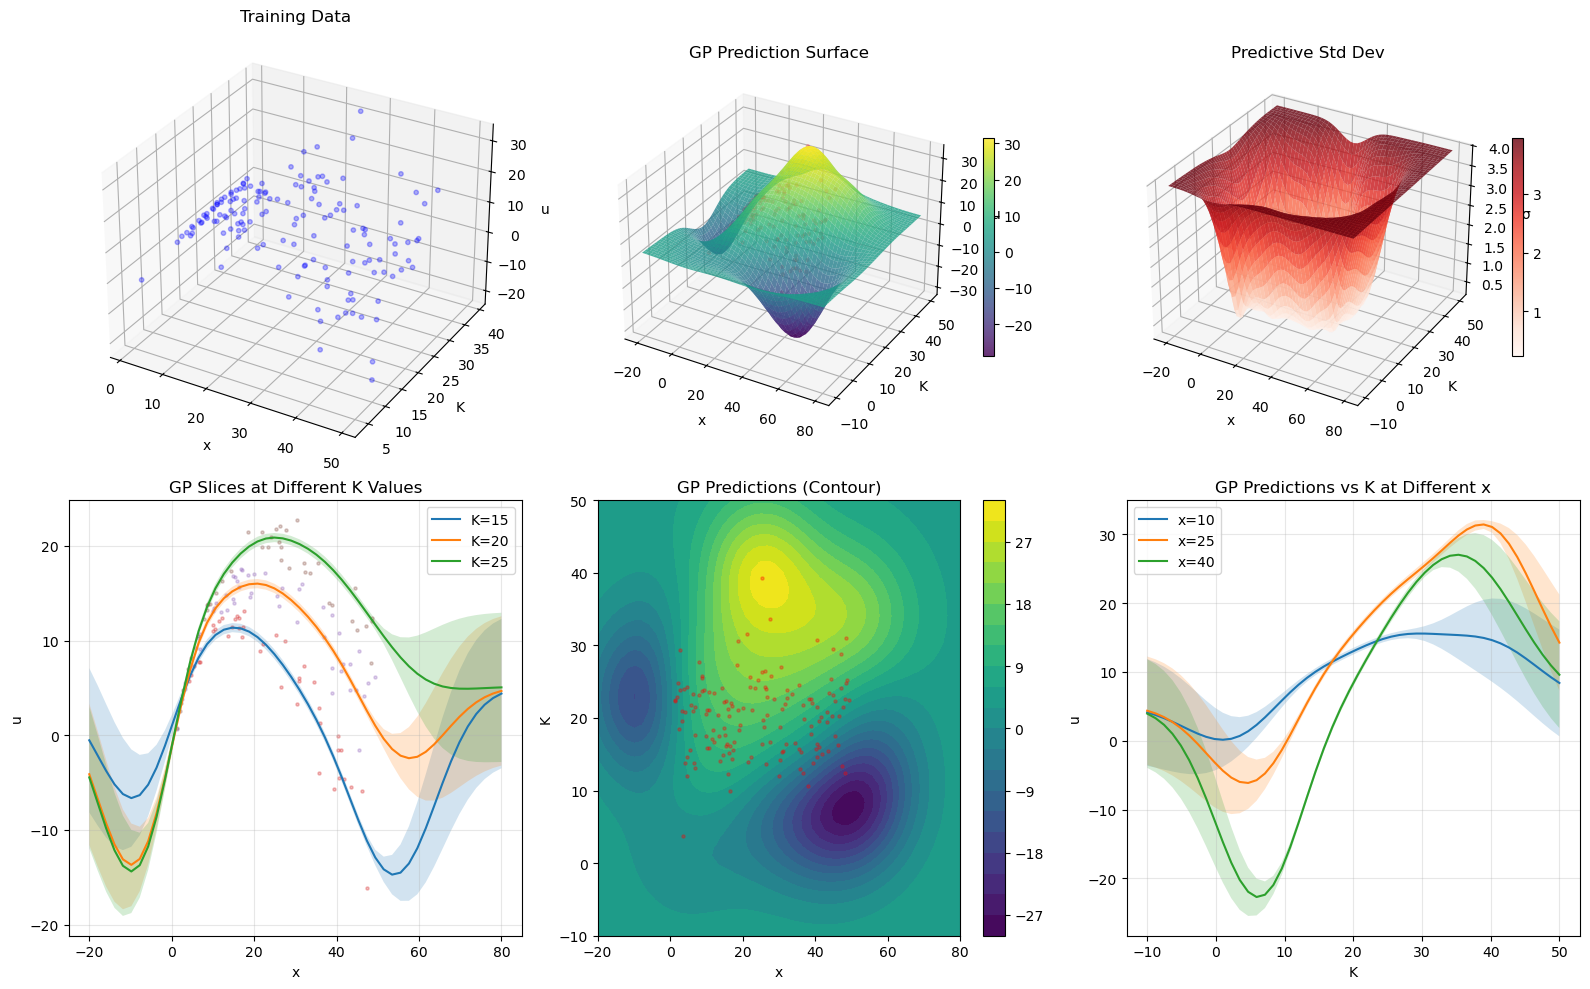


2D GP Regression Complete!


In [9]:
import numpy as np
import pandas as pd
import torch
import gpytorch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
torch.manual_seed(42)

print("="*70)
print("2D GP Regression: (x, K) -> u")
print("="*70 + "\n")

def generate_ode_data(num_samples, x_max=50, mu_K=20.0, sigma_K=5.0, 
                      add_noise=True, noise_std=0.2):
    x_samples = np.random.uniform(1, x_max, num_samples)
    K_samples = np.random.normal(mu_K, sigma_K, num_samples)
    K_samples = np.abs(K_samples) 
    
    solutions = []
    for x, K in zip(x_samples, K_samples):
        u = x * (np.log(K / x) + 1) - (np.log(K) + 1)
        if add_noise:
            u += np.random.normal(0, noise_std)
        solutions.append([x, K, u])
    
    df = pd.DataFrame(solutions, columns=['x', 'K', 'u'])
    return df

print("Step 1: Generating training data...")
num_train = 150
solutions_df = generate_ode_data(
    num_samples=num_train,
    x_max=50,
    mu_K=20.0,
    sigma_K=5.0,
    add_noise=True,
    noise_std=0.2
)

print(f"Generated {num_train} training samples")
print(f"x range: [{solutions_df['x'].min():.2f}, {solutions_df['x'].max():.2f}]")
print(f"K range: [{solutions_df['K'].min():.2f}, {solutions_df['K'].max():.2f}]")
print(f"u range: [{solutions_df['u'].min():.2f}, {solutions_df['u'].max():.2f}]\n")

train_x = torch.from_numpy(solutions_df[['x', 'K']].values).float()  # Shape: (500, 2)
train_y = torch.from_numpy(solutions_df['u'].values).float()          # Shape: (500,)

print(f"Training input shape: {train_x.shape}")
print(f"Training output shape: {train_y.shape}\n")
print("Step 2: Initializing 2D GP model...")

class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(ard_num_dims=2)
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
likelihood.noise = 0.04 
model = ExactGPModel(train_x, train_y, likelihood)

print(f"Model: {model.__class__.__name__}")
print(f"Kernel: RBF with ARD (separate lengthscales for x and K)")
print(f"Initial noise: {likelihood.noise.item():.4f}\n")

print("Step 3: Training the GP model...")
training_iter = 3000
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    
    if (i + 1) % 20 == 0:
        lengthscales = model.covar_module.base_kernel.lengthscale.detach().numpy()[0]
        print(f'Iter {i+1}/{training_iter} - Loss: {loss.item():.3f} | '
              f'Noise: {model.likelihood.noise.item():.4f} | '
              f'Lengthscales: x={lengthscales[0]:.2f}, K={lengthscales[1]:.2f}')
    optimizer.step()

print("\nLearned hyperparameters:")
lengthscales = model.covar_module.base_kernel.lengthscale.detach().numpy()[0]
print(f"  Noise variance: {likelihood.noise.item():.4f} (should be ~0.04)")
print(f"  Output scale: {model.covar_module.outputscale.item():.4f}")
print(f"  Lengthscale (x): {lengthscales[0]:.4f}")
print(f"  Lengthscale (K): {lengthscales[1]:.4f}\n")

print("Step 4: Making predictions...")

model.eval()
likelihood.eval()

# Prediction strategy: Create a grid in (x, K) space
x_grid = torch.linspace(-20, 80, 50)
K_grid = torch.linspace(-10, 50, 50)
X_mesh, K_mesh = torch.meshgrid(x_grid, K_grid, indexing='ij')

test_inputs = torch.stack([X_mesh.flatten(), K_mesh.flatten()], dim=1)

with torch.no_grad():
    pred = likelihood(model(test_inputs))
    pred_mean = pred.mean.reshape(X_mesh.shape)
    pred_std = pred.stddev.reshape(X_mesh.shape)

print(f"Test grid: {X_mesh.shape[0]} x {K_mesh.shape[0]} = {len(test_inputs)} points")
print(f"Prediction range: [{pred_mean.min():.2f}, {pred_mean.max():.2f}]\n")

print("Step 5: Plotting results...")

fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.scatter(solutions_df['x'], solutions_df['K'], solutions_df['u'], 
           c='blue', alpha=0.3, s=10)
ax1.set_xlabel('x')
ax1.set_ylabel('K')
ax1.set_zlabel('u')
ax1.set_title('Training Data')

ax2 = fig.add_subplot(2, 3, 2, projection='3d')
surf = ax2.plot_surface(X_mesh.numpy(), K_mesh.numpy(), pred_mean.numpy(), 
                        cmap='viridis', alpha=0.8, edgecolor='none')
ax2.scatter(solutions_df['x'], solutions_df['K'], solutions_df['u'], 
           c='red', alpha=0.2, s=5)
ax2.set_xlabel('x')
ax2.set_ylabel('K')
ax2.set_zlabel('u')
ax2.set_title('GP Prediction Surface')
fig.colorbar(surf, ax=ax2, shrink=0.5)

ax3 = fig.add_subplot(2, 3, 3, projection='3d')
surf_std = ax3.plot_surface(X_mesh.numpy(), K_mesh.numpy(), pred_std.numpy(), 
                            cmap='Reds', alpha=0.8, edgecolor='none')
ax3.set_xlabel('x')
ax3.set_ylabel('K')
ax3.set_zlabel('σ')
ax3.set_title('Predictive Std Dev')
fig.colorbar(surf_std, ax=ax3, shrink=0.5)

ax4 = fig.add_subplot(2, 3, 4)
for K_val in [15, 20, 25]:
    # Predict for this K slice
    test_x_slice = torch.stack([x_grid, torch.ones(50) * K_val], dim=1)
    with torch.no_grad():
        pred_slice = likelihood(model(test_x_slice))
    
    # Plot
    ax4.plot(x_grid.numpy(), pred_slice.mean.numpy(), label=f'K={K_val}')
    ax4.fill_between(x_grid.numpy(),
                     (pred_slice.mean - 2*pred_slice.stddev).numpy(),
                     (pred_slice.mean + 2*pred_slice.stddev).numpy(),
                     alpha=0.2)

for K_val in [15, 20, 25]:
    mask = (solutions_df['K'] >= K_val - 2.5) & (solutions_df['K'] <= K_val + 2.5)
    subset = solutions_df[mask]
    ax4.scatter(subset['x'], subset['u'], s=5, alpha=0.3)

ax4.set_xlabel('x')
ax4.set_ylabel('u')
ax4.set_title('GP Slices at Different K Values')
ax4.legend()
ax4.grid(alpha=0.3)

ax5 = fig.add_subplot(2, 3, 5)
contour = ax5.contourf(X_mesh.numpy(), K_mesh.numpy(), pred_mean.numpy(), 
                       levels=20, cmap='viridis')
ax5.scatter(solutions_df['x'], solutions_df['K'], c='red', s=5, alpha=0.3)
ax5.set_xlabel('x')
ax5.set_ylabel('K')
ax5.set_title('GP Predictions (Contour)')
fig.colorbar(contour, ax=ax5)


ax6 = fig.add_subplot(2, 3, 6)
for x_val in [10, 25, 40]:
    test_K_slice = torch.stack([torch.ones(50) * x_val, K_grid], dim=1)
    with torch.no_grad():
        pred_slice = likelihood(model(test_K_slice))
    
    ax6.plot(K_grid.numpy(), pred_slice.mean.numpy(), label=f'x={x_val}')
    ax6.fill_between(K_grid.numpy(),
                     (pred_slice.mean - 2*pred_slice.stddev).numpy(),
                     (pred_slice.mean + 2*pred_slice.stddev).numpy(),
                     alpha=0.2)

ax6.set_xlabel('K')
ax6.set_ylabel('u')
ax6.set_title('GP Predictions vs K at Different x')
ax6.legend()
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("2D GP Regression Complete!")
print("="*70)

# PINNS

PINN for dy/dx = log(K/x), y(1) = 0

Step 1: PINN architecture defined
Network: 2 inputs (x, K) -> [50, 50, 50] hidden -> 1 output (y)

Step 2: Loss functions defined
Step 3: Generating collocation points...
  PDE points: 10000
  BC points: 1000

Step 4: Generated 10 noisy solution points (is if they are measurements), can remove to be zero data scenario if wanted

Step 5: Training PINN...
Epoch 500/5000 | Total: 0.547648 | PDE: 0.254488 | BC: 0.000573 | Data: 2.841794
Epoch 1000/5000 | Total: 0.252335 | PDE: 0.194614 | BC: 0.000156 | Data: 0.528203
Epoch 1500/5000 | Total: 0.183030 | PDE: 0.163681 | BC: 0.000033 | Data: 0.169185
Epoch 2000/5000 | Total: 0.168040 | PDE: 0.152922 | BC: 0.000022 | Data: 0.127631
Epoch 2500/5000 | Total: 0.197770 | PDE: 0.150035 | BC: 0.003407 | Data: 0.115249
Epoch 3000/5000 | Total: 0.153935 | PDE: 0.140433 | BC: 0.000019 | Data: 0.106012
Epoch 3500/5000 | Total: 0.148211 | PDE: 0.134919 | BC: 0.000016 | Data: 0.099571
Epoch 4000/5000 | Total: 0.143822 

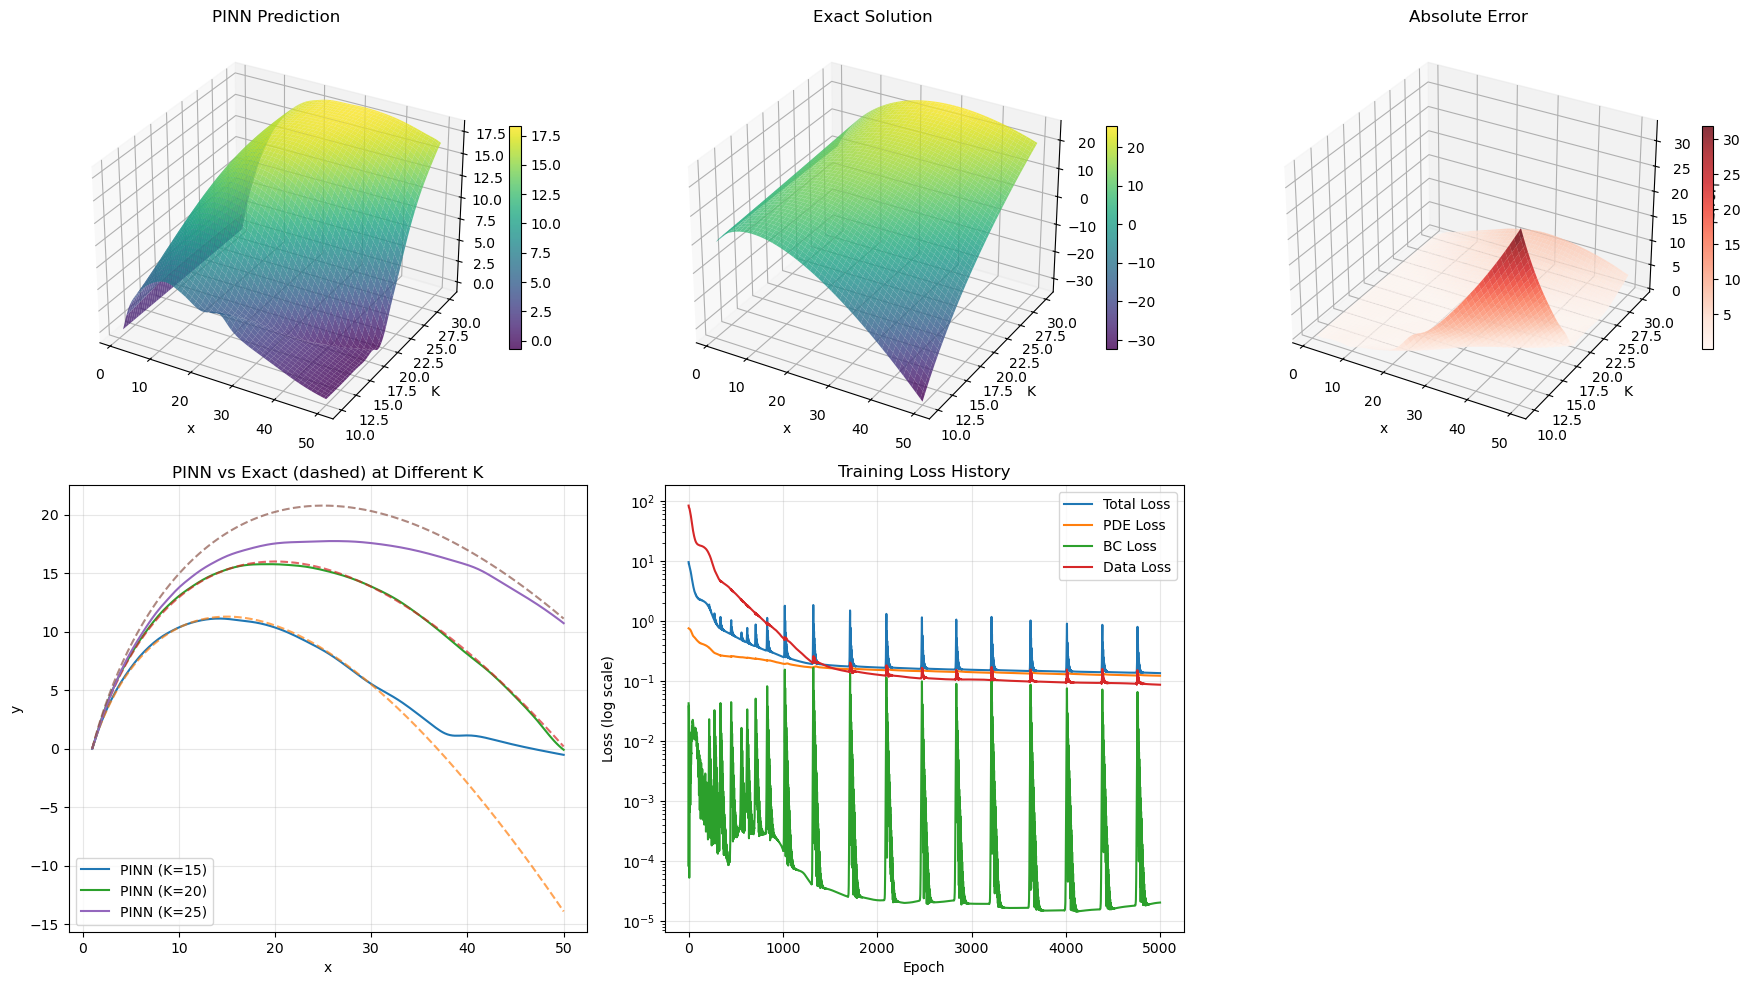


PINN Training Complete!


In [13]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

torch.manual_seed(42)
np.random.seed(42)

print("="*70)
print("PINN for dy/dx = log(K/x), y(1) = 0")
print("="*70 + "\n")


class PINN(nn.Module):
    def __init__(self, hidden_layers=[50, 50, 50]):
        super(PINN, self).__init__()
        
        layers = []
        layers.append(nn.Linear(2, hidden_layers[0])) 
        layers.append(nn.Tanh())
        
        for i in range(len(hidden_layers) - 1):
            layers.append(nn.Linear(hidden_layers[i], hidden_layers[i+1]))
            layers.append(nn.Tanh())
        
        layers.append(nn.Linear(hidden_layers[-1], 1)) 
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x, K):
        inputs = torch.cat([x, K], dim=1)
        return self.network(inputs)

print("Step 1: PINN architecture defined")
print(f"Network: 2 inputs (x, K) -> [50, 50, 50] hidden -> 1 output (y)\n")


def compute_pde_loss(model, x, K):
    x.requires_grad_(True)
    y = model(x, K)
    
    dy_dx = torch.autograd.grad(
        outputs=y,
        inputs=x,
        grad_outputs=torch.ones_like(y),
        create_graph=True,
        retain_graph=True
    )[0]
    
    pde_rhs = torch.log(K / x)
    pde_residual = dy_dx - pde_rhs
    
    loss = torch.mean(pde_residual ** 2)
    
    return loss

def compute_bc_loss(model, K_bc):
    x_bc = torch.ones(K_bc.shape[0], 1)
    y_bc = model(x_bc, K_bc)
    
    loss = torch.mean(y_bc ** 2)
    
    return loss

def compute_positivity_loss(model, x, K):
    y = model(x, K)
    
    negative_penalty = torch.mean(torch.relu(-y) ** 2)
    return negative_penalty

def compute_data_loss(model, x_data, K_data, y_data):
    y_pred = model(x_data, K_data)
    loss = torch.mean((y_pred - y_data) ** 2)
    return loss

print("Step 2: Loss functions defined")

def generate_collocation_points(n_pde, n_bc, x_range=[1, 50], K_mean=20, K_std=5):
    x_pde = torch.FloatTensor(n_pde, 1).uniform_(x_range[0], x_range[1])
    K_pde = torch.FloatTensor(n_pde, 1).normal_(K_mean, K_std)
    K_pde = torch.abs(K_pde)
    
    K_bc = torch.FloatTensor(n_bc, 1).normal_(K_mean, K_std)
    K_bc = torch.abs(K_bc)
    
    return x_pde, K_pde, K_bc

print("Step 3: Generating collocation points...")
n_pde = 10000 
n_bc = 1000 

x_pde, K_pde, K_bc = generate_collocation_points(n_pde, n_bc)

print(f"  PDE points: {n_pde}")
print(f"  BC points: {n_bc}\n")


def generate_data(n_data, x_range=[1, 50], K_mean=20, K_std=5, noise_std=0.0):
    x_data = np.random.uniform(x_range[0], x_range[1], n_data)
    K_data = np.random.normal(K_mean, K_std, n_data)
    K_data = np.abs(K_data)
    
    y_data = x_data * (np.log(K_data / x_data) + 1) - (np.log(K_data) + 1)
    
    if noise_std > 0:
        y_data += np.random.normal(0, noise_std, n_data)
    
    x_tensor = torch.FloatTensor(x_data).reshape(-1, 1)
    K_tensor = torch.FloatTensor(K_data).reshape(-1, 1)
    y_tensor = torch.FloatTensor(y_data).reshape(-1, 1)
    
    return x_tensor, K_tensor, y_tensor

n_data = 10
x_data, K_data, y_data = generate_data(n_data, noise_std=0.2)

print(f"Step 4: Generated {n_data} noisy solution points (is if they are measurements), can remove to be zero data scenario if wanted\n")

print("Step 5: Training PINN...")

model = PINN(hidden_layers=[64, 64, 64])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 5000
lambda_pde = 1.0 
lambda_bc = 10.0 
lambda_data = 0.1 
lambda_pos = 1.0

loss_history = {'total': [], 'pde': [], 'bc': [], 'data': []}

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Compute losses
    loss_pde = compute_pde_loss(model, x_pde, K_pde)
    loss_pos = compute_positivity_loss(model, x_pde, K_pde)
    loss_bc = compute_bc_loss(model, K_bc)
    loss_data = compute_data_loss(model, x_data, K_data, y_data) if n_data > 0 else 0
    
    loss = lambda_pde * loss_pde + lambda_bc * loss_bc + lambda_data * loss_data + lambda_pos * loss_pos
    
    loss.backward()
    optimizer.step()
    
    loss_history['total'].append(loss.item())
    loss_history['pde'].append(loss_pde.item())
    loss_history['bc'].append(loss_bc.item())
    if n_data > 0:
        loss_history['data'].append(loss_data.item())
    
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch+1}/{n_epochs} | "
              f"Total: {loss.item():.6f} | "
              f"PDE: {loss_pde.item():.6f} | "
              f"BC: {loss_bc.item():.6f} | "
              f"Data: {loss_data.item() if n_data > 0 else 0:.6f}")

print("\nTraining complete!\n")

print("Step 6: Evaluating PINN...")

model.eval()

x_test = torch.linspace(1, 50, 100)
K_test = torch.linspace(10, 30, 100)
X_mesh, K_mesh = torch.meshgrid(x_test, K_test, indexing='ij')

x_flat = X_mesh.flatten().reshape(-1, 1)
K_flat = K_mesh.flatten().reshape(-1, 1)

with torch.no_grad():
    y_pred = model(x_flat, K_flat)
    y_pred_mesh = y_pred.reshape(X_mesh.shape)

y_exact = (X_mesh * (torch.log(K_mesh / X_mesh) + 1) - 
           (torch.log(K_mesh) + 1))

error = torch.abs(y_pred_mesh - y_exact)
relative_error = error / (torch.abs(y_exact) + 1e-8)

print(f"Max absolute error: {error.max().item():.6f}")
print(f"Mean absolute error: {error.mean().item():.6f}")
print(f"Mean relative error: {relative_error.mean().item():.6f}\n")

print("Step 7: Plotting results...")

fig = plt.figure(figsize=(18, 10))

ax1 = fig.add_subplot(2, 3, 1, projection='3d')
surf1 = ax1.plot_surface(X_mesh.numpy(), K_mesh.numpy(), y_pred_mesh.numpy(),
                         cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_xlabel('x')
ax1.set_ylabel('K')
ax1.set_zlabel('y')
ax1.set_title('PINN Prediction')
fig.colorbar(surf1, ax=ax1, shrink=0.5)

ax2 = fig.add_subplot(2, 3, 2, projection='3d')
surf2 = ax2.plot_surface(X_mesh.numpy(), K_mesh.numpy(), y_exact.numpy(),
                         cmap='viridis', alpha=0.8, edgecolor='none')
ax2.set_xlabel('x')
ax2.set_ylabel('K')
ax2.set_zlabel('y')
ax2.set_title('Exact Solution')
fig.colorbar(surf2, ax=ax2, shrink=0.5)

ax3 = fig.add_subplot(2, 3, 3, projection='3d')
surf3 = ax3.plot_surface(X_mesh.numpy(), K_mesh.numpy(), error.numpy(),
                         cmap='Reds', alpha=0.8, edgecolor='none')
ax3.set_xlabel('x')
ax3.set_ylabel('K')
ax3.set_zlabel('|Error|')
ax3.set_title('Absolute Error')
fig.colorbar(surf3, ax=ax3, shrink=0.5)

ax4 = fig.add_subplot(2, 3, 4)
for K_val in [15, 20, 25]:
    x_slice = torch.linspace(1, 50, 200).reshape(-1, 1)
    K_slice = torch.ones_like(x_slice) * K_val
    with torch.no_grad():
        y_slice = model(x_slice, K_slice)
    
    y_exact_slice = (x_slice * (torch.log(K_slice / x_slice) + 1) - 
                     (torch.log(K_slice) + 1))
    
    ax4.plot(x_slice.numpy(), y_slice.numpy(), '-', label=f'PINN (K={K_val})')
    ax4.plot(x_slice.numpy(), y_exact_slice.numpy(), '--', alpha=0.7)

ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('PINN vs Exact (dashed) at Different K')
ax4.legend()
ax4.grid(alpha=0.3)

ax5 = fig.add_subplot(2, 3, 5)
ax5.semilogy(loss_history['total'], label='Total Loss')
ax5.semilogy(loss_history['pde'], label='PDE Loss')
ax5.semilogy(loss_history['bc'], label='BC Loss')
if n_data > 0:
    ax5.semilogy(loss_history['data'], label='Data Loss')
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Loss (log scale)')
ax5.set_title('Training Loss History')
ax5.legend()
ax5.grid(alpha=0.3)


plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("PINN Training Complete!")
print("="*70)

NOTE: I added loss function to move y(x) to be positive where we punish when negative